<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/DeepLearning7150/blob/main/Homework2/HW2_1_QuickDrawClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This can be run [run on Google Colab using this link](https://colab.research.google.com/github/CS7150/CS7150-Homework-2/blob/main/HW2.1-QuickDrawClassifier.ipynb)


# Assignment 2.1: Neural Network QuickDraw Classification

In this CS7150 assignment, we will develop a neural network with three fully-connected layers to perform classification, and test it out on a subset of the QuickDraw dataset. This notebook acts as a tutorial to get you started on writing Pytorch code to create Deep Learning models. 

**Your task**: Go through the entire notebook and fill out all the conceptual and technical questions that are indicated within the "Exercise" header. 

# Setup Code

Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the autoreload extension. This allows us to edit .py source files (if there are any), and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

## Device Setup

We want to be able to train our model on a GPU to accelerate our computation. Let’s check to see if torch.cuda is available, else we continue to use the CPU.

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Google Colab Setup

Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
in_colab = False
try:
    from google.colab import drive
    drive.mount('/content/drive')
    in_colab = True
except:
    pass

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the folowing cell should print the filenames from the assignment:

```
['HW2.1-QuickDrawClassifier.ipynb', 'HW2.2-CIFAR10Classifier.ipynb']
```

In [ ]:
import os
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks'
if in_colab:
    # TODO: Fill in the Google Drive path where you uploaded the assignment
    # Example: If you create a CS7150 folder and put all the files under HW2 folder, then 'CS7150/HW2'
    # GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS7150/HW2'
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))

['Copy of Skydio Turtle Challenge - [ your name here ]', 'HW1-PytorchDemo.ipynb', 'Copy of Demonstration Code.ipynb', 'GAN_Working_MNIST_TensorFlow.ipynb', 'Copy of HW1_Pytorch.ipynb', 'Copy of ZigZagScenario.ipynb', 'Copy of HW2.2_DenoisingAutoencoder.ipynb', 'HW2.0_Backpropagation.ipynb', 'Untitled0.ipynb', 'Copy of HW2.1-QuickDrawClassifier.ipynb', 'Copy of Copy of HW2.1-QuickDrawClassifier.ipynb']


# Loading TinyQuickDraw Data

The QuickDraw dataset is a recent popular dataset that consists of human-drawn images that were drawn by users playing the [Quick, Draw!](https://quickdraw.withgoogle.com/) game. The entire dataset consists of about 50 million drawings across 345 categories. For this exercise, we chose a subset of images, TinyQuickDraw, across 20 categories, namely: Apple, Bat, Broccoli, Carrot, Cookie, Donut, Horse, Knee, Leaf, Lobster, Mushroom, Pizza, Rain, River, Sandwich, Shark, Strawberry, T-Shirt, Van, and Watermelon. Hence, our data will be classified into one of these 20 classes.

You should have a local copy of your data in the directory of where this notebook is stored. Since this is a custom dataset where images with png extensions are stored, we use the [ImageFolder](http://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html) package to load our data.

In [ ]:
import os
import torch
from torch import nn
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, ToTensor
import torch.utils.data as data_utils
from torchvision.datasets.utils import download_and_extract_archive
# setting directory paths for training and testing data
url = "https://cs7150.baulab.info/2022-Fall/data/tiny_quick_draw.zip"
if not os.path.isdir('tiny_quick_draw'):
    download_and_extract_archive(url, 'tiny_quick_draw')
train_data_dir = "tiny_quick_draw/train"
test_data_dir = "tiny_quick_draw/test"
train_data = ImageFolder(train_data_dir, transform=Compose([ToTensor()]))
# storing and printing what each labels represent
class_to_idx = train_data.class_to_idx
print("Labels and their assigned label numbers: ", class_to_idx)
test_data = ImageFolder(test_data_dir, transform=Compose([ToTensor()]))
# check the length of dataset
print(f'Number of samples in training data: {len(train_data)}')
print(f'Number of samples in test data: {len(test_data)}')

  0%|          | 0/2965111 [00:00<?, ?it/s]

Extracting tiny_quick_draw/tiny_quick_draw.zip to tiny_quick_draw
Labels and their assigned label numbers:  {'Apple': 0, 'Bat': 1, 'Broccoli': 2, 'Carrot': 3, 'Cookie': 4, 'Donut': 5, 'Horse': 6, 'Knee': 7, 'Leaf': 8, 'Lobster': 9, 'Mushroom': 10, 'Pizza': 11, 'Rain': 12, 'River': 13, 'Sandwich': 14, 'Shark': 15, 'Strawberry': 16, 'T-Shirt': 17, 'Van': 18, 'Watermelon': 19}
Number of samples in training data: 500
Number of samples in test data: 500


# Displaying Loaded Dataset

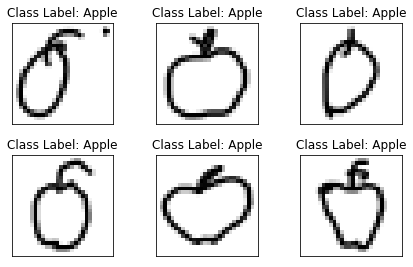

In [ ]:
import matplotlib.pyplot as plt

idx_to_class = {}
# creating a label number to label dict for easy representation in graphs
for label, idx in class_to_idx.items():
    idx_to_class[idx] = label
    
fig = plt.figure()

# showing 6 different images of the Apple class
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(train_data[i][0][0], cmap='gray', interpolation='none')
  plt.title("Class Label: {}".format(idx_to_class[train_data[i][1]]))
  plt.xticks([])
  plt.yticks([])

# Building a Neural Network

Neural networks consist of modules that perform data operations. The torch.nn namespace provides all the building blocks we would need to build our own neural network. In the following sections, we’ll build a neural network to classify images in the TinyQuickDraw dataset.

## Defining a class

We define our neural network by subclassing nn.Module, and initializing the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method. In the following cells, we show how we construct our neural network and illustrate the different components in it.

In [ ]:
class TinyQuickDrawClassifier(nn.Module):
    def __init__(self):
        super(TinyQuickDrawClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.class_size = 20
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*28*28, 1000),
            nn.ReLU(),
            nn.Linear(1000, self.class_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Let's create an instance of QuickDrawClassifier and move it to the device

In [ ]:
model = TinyQuickDrawClassifier().to(device)

### Model Parameters

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In this example, we iterate over each parameter, and print its size and a preview of its values.

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: TinyQuickDrawClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=20, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([1000, 2352]) | Values : tensor([[ 0.0099, -0.0176, -0.0096,  ..., -0.0107,  0.0058, -0.0066],
        [ 0.0150, -0.0121,  0.0160,  ..., -0.0174,  0.0199, -0.0043]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([1000]) | Values : tensor([-0.0002, -0.0025], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([20, 1000]) | Values : tensor([[-0.0310,  0.0048, -0.0291,  ...,  0.0315,  0.0213,  0.0128],
        [-0.0311, -0.0204,  0.0140,  ...,  0.0081,  0.0016,  0.0223]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch

Let’s break down the layers we created in the QuickDrawClassifier model. To illustrate it, we will take a sample image and see what happens to it as we pass it through the network.

### Sample Image

Size of the image shown: torch.Size([1, 3, 28, 28])


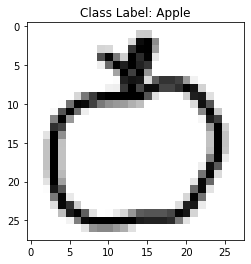

In [ ]:
input_image = train_data[1][0]
input_image = input_image[None,:,:,:]
print("Size of the image shown:", input_image.size())
plt.imshow(input_image[0][0], cmap='gray', interpolation='none')
plt.title("Class Label: {}".format(idx_to_class[train_data[1][1]]))
plt.show()

### nn.Flatten

In __init__, we defined flatten to be [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html). It is used in the forward function. Its purpose is to convert each 2D 28x28 image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained).

torch.Size([1, 2352])


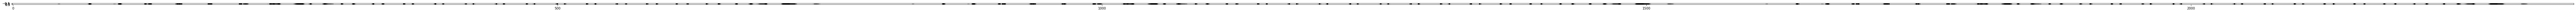

In [ ]:
import matplotlib.pyplot as plt
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
fig = plt.figure()
fig.set_figwidth(142)
fig.set_figheight(100)
plt.imshow(flat_image, cmap='gray') #Note: Zoom in a lot to see the image being flatten to a vector

### nn.Linear

[nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) is a module that applies a linear transformation on the input using its stored weights and biases.

In [ ]:
layer1 = nn.Linear(in_features=3*28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([1, 20])


### nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena. In this model, we use [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) between our linear layers, but there’s other activations to introduce non-linearity in our model.

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1057,  0.0668,  0.2621, -0.5927,  0.3658,  0.7562,  0.1000, -0.2912,
         -1.3275, -0.2982,  0.0443,  0.2387,  0.3715, -0.5811,  0.6200,  0.0755,
          0.7789,  0.0892,  0.3350,  0.7007]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1057, 0.0668, 0.2621, 0.0000, 0.3658, 0.7562, 0.1000, 0.0000, 0.0000,
         0.0000, 0.0443, 0.2387, 0.3715, 0.0000, 0.6200, 0.0755, 0.7789, 0.0892,
         0.3350, 0.7007]], grad_fn=<ReluBackward0>)


### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 20)
)
input_image = train_data[1][0]
logits = seq_modules(input_image[None,:,:,:])

### nn.Softmax and Predicting class

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. The 'dim' parameter indicates the dimension along which the values must sum to 1.

*Note: Since the model hasn't been trained yet (includes randomized weights and bias values), it is very likely that the predicted image label is different from the actual one.*

Predicted class: Shark
Actual class: Apple


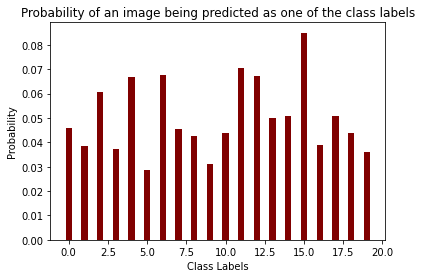

Summing of probabilities from each class for an image is equal to 1.0000000223517418


In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab_detached = pred_probab.detach().numpy()[0]
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {idx_to_class[y_pred.item()]}")
y_actual = train_data[1][1]
print(f"Actual class: {idx_to_class[y_actual]}")

plt.bar([i for i in range(len(pred_probab_detached))], pred_probab_detached, color ='maroon',
        width = 0.4)
 
plt.xlabel("Class Labels")
plt.ylabel("Probability")
plt.title("Probability of an image being predicted as one of the class labels")
plt.show()

print("Summing of probabilities from each class for an image is equal to", sum(pred_probab_detached))

# Training a Neural Network

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph. In the following cell, we set the parameters within the model function to activate this feature.

In [ ]:
model.requires_grad_(True)

TinyQuickDrawClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=20, bias=True)
  )
)

Before defining our training loop, let's define our hyperparameters, loss and optimizer functions.

## Hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:

- Number of Epochs - the number times to iterate over the dataset

- Batch Size - the number of data samples propagated through the network before the parameters are updated

- Learning Rate - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [ ]:
learning_rate = 0.02
batch_size = 500
epochs = 300

## Loss function

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value. Common loss functions include [nn.MSELoss (Mean Square Error)](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) and nn.CrossEntropyLoss. 

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

## Optimizer

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this case, we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different [optimizers](https://pytorch.org/docs/stable/optim.html) available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.8)

## Train Loop

Inside the training loop, optimization happens in three steps:

- Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

- Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.

- Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In the above cell, we used a Dataloader to create batches for training and testing data. For each batch of size indicated in the batch_size hyperparameter, we perform backprop and update the model parameters' weights and biases.

In the following cell, we define our train_loop.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, print_log=True):
    size = len(dataloader.dataset)
    correct = 0
    training_acc = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))
        correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (print_log==True) and (batch % 100 == 0):
            loss, current = loss.item(), batch * len(X)
            print(f"""Training loop: loss: {loss:>7f}  [{current:>5d}/{size:>5d}]""")
    correct /= size
    training_acc = 100*correct
    if (print_log==True):
        print(f"""Training Accuracy: {training_acc:>0.1f}%""")
    return training_acc

## Test Loop

In the test loop, we iterate over the test dataset to check if model performance is improving.

In [ ]:
def test_loop(dataloader, model, loss_fn, print_log=True):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    testing_acc = 100*correct
    if (print_log==True):
        print(f"Testing loop: \n Accuracy: {testing_acc:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return testing_acc, test_loss

## Running the loops

We run our loops for a certain number of times, which is indicated in the 'epoch' hyperparameter that we defined earlier. In the following cell, we run both our training and testing loop to see how our training and testing accuracies change over time.

Epoch 1
-------------------------------
Training loop: loss: 3.023751  [    0/  500]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 6.2%, Avg loss: 2.999137 

Epoch 2
-------------------------------
Training loop: loss: 2.998937  [    0/  500]
Training Accuracy: 6.0%
Testing loop: 
 Accuracy: 10.4%, Avg loss: 2.978129 

Epoch 3
-------------------------------
Training loop: loss: 2.971754  [    0/  500]
Training Accuracy: 9.0%
Testing loop: 
 Accuracy: 7.0%, Avg loss: 2.964107 

Epoch 4
-------------------------------
Training loop: loss: 2.950931  [    0/  500]
Training Accuracy: 10.2%
Testing loop: 
 Accuracy: 6.8%, Avg loss: 2.951036 

Epoch 5
-------------------------------
Training loop: loss: 2.930699  [    0/  500]
Training Accuracy: 9.0%
Testing loop: 
 Accuracy: 7.6%, Avg loss: 2.932261 

Epoch 6
-------------------------------
Training loop: loss: 2.904244  [    0/  500]
Training Accuracy: 10.8%
Testing loop: 
 Accuracy: 13.8%, Avg loss: 2.909678 

Epoch 7
----------------

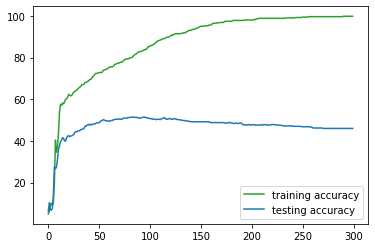

In [ ]:
example_train_accs = []
example_test_accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    training_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    testing_acc, _ = test_loop(test_dataloader, model, loss_fn)
    example_train_accs.append(training_acc)
    example_test_accs.append(testing_acc)
print("Done!")

epoch_list = [i for i in range(epochs)]
plt.plot(epoch_list, example_train_accs, color ='tab:green', label='training accuracy')
plt.plot(epoch_list, example_test_accs, color ='tab:blue', label='testing accuracy')
plt.legend()

## Underfitting and Overfitting Models

When the model is not trained properly, there are generally two extreme phenonemons that can occur. One is that the model is underfitted, which means that the model has not captured the underlying logic of the data. We would have high loss and low accuracy in such a case.

In the above trained model, you will notice that the training accuracy is around 100% while the testing accuracy is around 50%. When there is such a significant difference between these accuracies, we say that the model is overfitted. This means that our training has focused on the particular training set so much that the model has missed its classification objective entirely. We don't want that to happen!

**Exercise**: We would like you raise the testing accuracy until it is close to the training accuracy. We have a code block after the following section for you to demonstrate final modified model and its hyperparameters.

# Understanding Autograd Better

The autograd has a pack_hook function, which is called everytime an operation saves a tensor for backward.

In the following cell, we print out the functions for which respective tensors are stored for computational purposes in one backward pass. We defined two functions, pack_hook and unpack_hook. The output of pack_hook is stored in the computation graph instead of the original tensor. The unpack_hook uses that return value to compute a new tensor, which is the one actually used during the backward pass.  In general, you want unpack_hook(pack_hook(t)) to be equal to t. Under the hood, PyTorch has **packed** and **unpacked** the tensor to prevent reference cycles. As a rule of thumb, you should not rely on the fact that accessing the tensor saved for backward will yield the same tensor object as the original tensor. They will however share the same storage.

In [ ]:
def pack_hook(x):
    print("Packing/Storing following value in computation graph", x.grad_fn, x.shape)
    return x

def unpack_hook(x):
    print("Unpacking/Creating following tensor for backward pass", x.grad_fn, x.shape)
    return x

def grad_hook(x):
    print("Updating gradient of", x.grad_fn, x.shape)
    return x

def train_instance_with_saved_tensor(dataloader, model, loss_fn, optimizer, print_log=True):
    size = len(dataloader.dataset)
    for p in model.parameters():
        p.register_hook(grad_hook)
    with torch.autograd.graph.saved_tensors_hooks(pack_hook, unpack_hook):
        for batch, (X, y) in enumerate(dataloader):
            # Compute prediction and loss
            print("About to run the model on a batch of size", len(X))
            pred = model(X.to(device))
            print("About to run the loss")
            loss = loss_fn(pred, y.to(device))

            # Backpropagation
            print("About to set zero grad")
            optimizer.zero_grad()
            print("loss.backward about to run")
            loss.backward()
            print("optimizer.step() about to run")
            optimizer.step()
            break
        return pred, loss
                
                
print(f"Running one backpass")
pred, loss = train_instance_with_saved_tensor(train_dataloader, model, loss_fn, optimizer)
print("Done!")

Running one backpass
About to run the model on a batch of size 500
Packing/Storing following value in computation graph None torch.Size([500, 2352])
Packing/Storing following value in computation graph <ReluBackward0 object at 0x7fe7d5def110> torch.Size([500, 1000])
Packing/Storing following value in computation graph <TBackward0 object at 0x7fe7d5def110> torch.Size([1000, 20])
Packing/Storing following value in computation graph <ReluBackward0 object at 0x7fe7d5d5eb90> torch.Size([500, 1000])
About to run the loss
Packing/Storing following value in computation graph <LogSoftmaxBackward0 object at 0x7fe7d5def110> torch.Size([500, 20])
Packing/Storing following value in computation graph <LogSoftmaxBackward0 object at 0x7fe7d5def110> torch.Size([500, 20])
Packing/Storing following value in computation graph None torch.Size([500])
Packing/Storing following value in computation graph None torch.Size([])
About to set zero grad
loss.backward about to run
Unpacking/Creating following tensor 

## Exercise 2.1.1

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=3bf581bcd7ba19d7ab4a4803a37b2bf70a366e33b486c689d05090edb8800b64
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


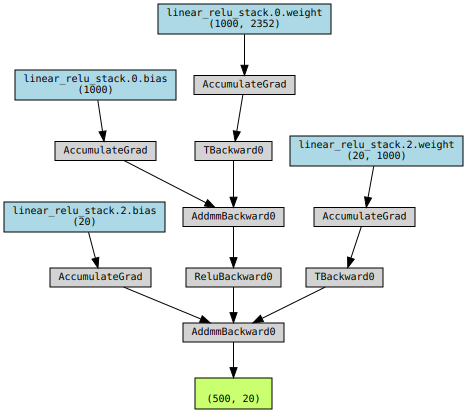

In [ ]:
from torchviz import make_dot

make_dot(pred, params=dict(list(model.named_parameters())))

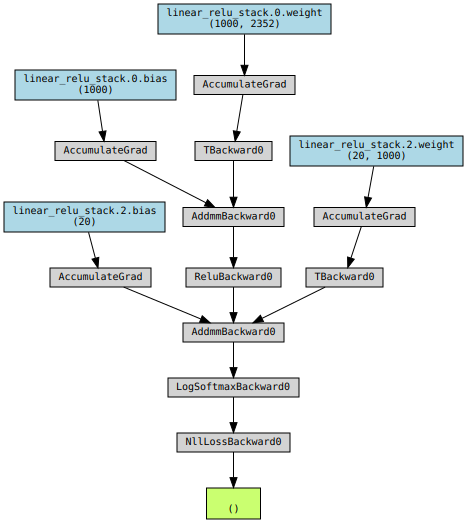

In [ ]:
make_dot(loss, params=dict(list(model.named_parameters())))

**Question:** Based on the saved_tensor_hook results, what values are stored for backward pass and why? What values are updated in one backward pass?

In [4]:
# TODO:Replace the placeholder text and fill out the print statement below to answer the above question
print("""For backward pass normally the values that will be useful in gradient calculation will be stored. \nA linear layer would perform Wx + B, matrix multiplication followed by bias adding. We need to send gradients backward to W and B from a linear layer. \nIn order to do that we store Output of Linear Layer 1 and Linear Layer 2. Linear(x) = Wx + B, so we have a matrix multiplication then a addition """)
print("Differentiation for addition will be alwyas one so we dont have to store that, but for matrix the gradient is based on the input passed to multiplication,\n so we store those two values that is incoming value of x and W.")
print("So x value that enters Linear Layer 1 and the result of activation of ReLu which is input to linear layer two along with the Weights W1 and W2 matrix is \nstored.")
print("""In one backward pass the values that get updated are \n1) Gradient of Bias of Second Linear Layer\n2) Gradient for the weights of Second Linear Layer\n3) Gradient for weights of First Linear Layer\n4) Gradients for bias of First Linear Layer""")

# Gradient values are updated in the backward pass( the weights ). 

For backward pass normally the values that will be useful in gradient calculation will be stored. 
A linear layer would perform Wx + B, matrix multiplication followed by bias adding. We need to send gradients backward to W and B from a linear layer. 
In order to do that we store Output of Linear Layer 1 and Linear Layer 2. Linear(x) = Wx + B, so we have a matrix multiplication then a addition 
Differentiation for addition will be alwyas one so we dont have to store that, but for matrix the gradient is based on the input passed to multiplication,
 so we store those two values that is incoming value of x and W.
So x value that enters Linear Layer 1 and the result of activation of ReLu which is input to linear layer two along with the Weights W1 and W2 matrix is 
stored.
In one backward pass the values that get updated are 
1) Gradient of Bias of Second Linear Layer
2) Gradient for the weights of Second Linear Layer
3) Gradient for weights of First Linear Layer
4) Gradients for bias of Fi

## Exercise 2.1.2

**Exercise**: As mentioned earlier, we would like you to reduce the overfitting of the model. Overfitting is caused when the model is overparameterized compared to the size and diversity of the training data, and can be improved in the following ways:

 * Increase the size of the training data.
 * Reduce the parameters of the model, or change the number of layers.
 * Increase regularization of the model, for example, by using weight decay.

In the code below we have already done the first of those steps: we have increased the size of the training data.  Be sure to shuffle the batches of training data to ensure diversity.

You can further reduce overfitting by changing the number of neurons in in your model.  One way to reduce the number of neurons while keeping an expressive model is to arrange fewer neurons in more layers.

You can also reduce overfitting by adjusting the hyperparameters.  Weight decay reduces the size of parameters and encourages the model to learn a simpler function that will be less prone to overfitting.

In the code below we have defined the a new class `TinyQuickDrawStudentClassifier` for the  classifier and redefined the hyperparameters. You should re-implement this class and change the hyperparameters until you get the testing accuracy to stabilize at 60\% or above.  It is OK for training accuracy to be low; your aim should be to have training accuracy close to testing accuracy.

You can use the **Fine-Tuning Hyperparameters"** section to understand and record how changes to different parameter values affect your model's accuracy.

To get full credit for this section, the testing accuracy should be 60% or above. 

In [ ]:
class TinyQuickDrawStudentClassifier(nn.Module):
    def __init__(self):
        super(TinyQuickDrawStudentClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.class_size = 20
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*28*28, 1000),
            nn.ReLU(),
            nn.Linear(1000, 20),
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Linear(250, self.class_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
def getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening):
  # Train and Test
  test_accs = []
  test_losses = []
  training_accs = []
  model = TinyQuickDrawStudentClassifier().to(device)
  model.requires_grad_(True)
  # Optimizer
  optimizer = torch.optim.SGD(model.parameters(), 
                          lr = learning_rate, 
                          momentum = momentum, 
                          weight_decay = weight_decay, 
                          dampening= dampening)
  # Loss Func
  loss_fn = nn.CrossEntropyLoss()
  # Dataloaders
  # Created a bigger training dataset for better model training
  train_data_dir = "tiny_quick_draw/bigger_train"
  train_data = ImageFolder(train_data_dir, transform=Compose([ToTensor()]))
  train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
  test_dataloader = DataLoader(test_data, batch_size=batch_size)
  example_train_accs = []
  example_test_accs = []
  for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      training_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
      testing_acc, _ = test_loop(test_dataloader, model, loss_fn)
      example_train_accs.append(training_acc)
      example_test_accs.append(testing_acc)
  print("Done!")

  epoch_list = [i for i in range(epochs)]
  plt.plot(epoch_list, example_train_accs, color ='tab:green', label='training accuracy')
  plt.plot(epoch_list, example_test_accs, color ='tab:blue', label='testing accuracy')
  plt.legend()

# Varying Hyperparameters

### Best Model of all the variations tried.

Epoch 1
-------------------------------
Training loop: loss: 2.994054  [    0/ 4000]
Training Accuracy: 6.9%
Testing loop: 
 Accuracy: 8.6%, Avg loss: 2.972969 

Epoch 2
-------------------------------
Training loop: loss: 2.970397  [    0/ 4000]
Training Accuracy: 16.4%
Testing loop: 
 Accuracy: 22.0%, Avg loss: 2.924062 

Epoch 3
-------------------------------
Training loop: loss: 2.910456  [    0/ 4000]
Training Accuracy: 23.1%
Testing loop: 
 Accuracy: 30.8%, Avg loss: 2.729979 

Epoch 4
-------------------------------
Training loop: loss: 2.720883  [    0/ 4000]
Training Accuracy: 25.4%
Testing loop: 
 Accuracy: 24.4%, Avg loss: 2.461624 

Epoch 5
-------------------------------
Training loop: loss: 2.331844  [    0/ 4000]
Training Accuracy: 30.0%
Testing loop: 
 Accuracy: 34.4%, Avg loss: 2.123321 

Epoch 6
-------------------------------
Training loop: loss: 2.150594  [    0/ 4000]
Training Accuracy: 36.1%
Testing loop: 
 Accuracy: 37.4%, Avg loss: 1.949421 

Epoch 7
----------

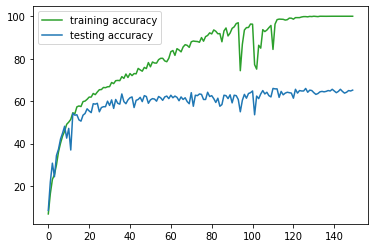

In [ ]:
learning_rate = 0.03
batch_size = 100
epochs = 150
momentum = 0.5
weight_decay = 0
dampening = 0
getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening)

## Weight Decay Changes

### 0.5

Epoch 1
-------------------------------
Training loop: loss: 2.995569  [    0/ 4000]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 4.8%, Avg loss: 2.994744 

Epoch 2
-------------------------------
Training loop: loss: 2.995121  [    0/ 4000]
Training Accuracy: 5.1%
Testing loop: 
 Accuracy: 4.4%, Avg loss: 2.993959 

Epoch 3
-------------------------------
Training loop: loss: 2.994741  [    0/ 4000]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 4.4%, Avg loss: 2.993494 

Epoch 4
-------------------------------
Training loop: loss: 2.991179  [    0/ 4000]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 4.2%, Avg loss: 2.993294 

Epoch 5
-------------------------------
Training loop: loss: 2.991183  [    0/ 4000]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 4.2%, Avg loss: 2.993253 

Epoch 6
-------------------------------
Training loop: loss: 2.991774  [    0/ 4000]
Training Accuracy: 5.0%
Testing loop: 
 Accuracy: 4.2%, Avg loss: 2.993315 

Epoch 7
--------------------

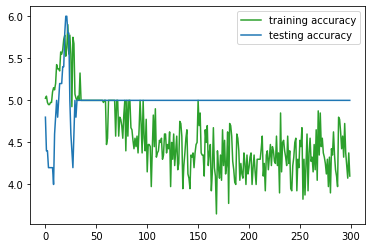

In [ ]:
learning_rate = 0.01
batch_size = 500
epochs = 300
momentum = 0
weight_decay = 0.5
dampening = 0
getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening)

### 0.01 and Batch size 100

Epoch 1
-------------------------------
Training loop: loss: 2.998088  [    0/ 4000]
Training Accuracy: 5.7%
Testing loop: 
 Accuracy: 6.0%, Avg loss: 2.990498 

Epoch 2
-------------------------------
Training loop: loss: 2.991244  [    0/ 4000]
Training Accuracy: 7.7%
Testing loop: 
 Accuracy: 8.6%, Avg loss: 2.985737 

Epoch 3
-------------------------------
Training loop: loss: 2.982430  [    0/ 4000]
Training Accuracy: 9.3%
Testing loop: 
 Accuracy: 10.6%, Avg loss: 2.981137 

Epoch 4
-------------------------------
Training loop: loss: 2.977518  [    0/ 4000]
Training Accuracy: 11.2%
Testing loop: 
 Accuracy: 15.8%, Avg loss: 2.976167 

Epoch 5
-------------------------------
Training loop: loss: 2.975222  [    0/ 4000]
Training Accuracy: 16.4%
Testing loop: 
 Accuracy: 17.4%, Avg loss: 2.970873 

Epoch 6
-------------------------------
Training loop: loss: 2.971197  [    0/ 4000]
Training Accuracy: 17.6%
Testing loop: 
 Accuracy: 20.2%, Avg loss: 2.965062 

Epoch 7
-------------

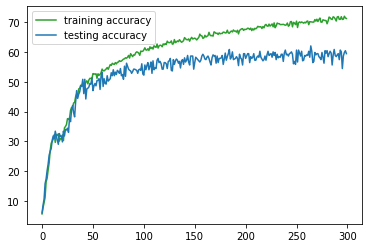

In [ ]:
learning_rate = 0.01
batch_size = 100
epochs = 300
momentum = 0
weight_decay = 0.01
dampening = 0
getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening)

### 0.5 and batch 50

Epoch 1
-------------------------------
Training loop: loss: 2.990443  [    0/ 4000]
Training Accuracy: 8.9%
Testing loop: 
 Accuracy: 9.4%, Avg loss: 2.974171 

Epoch 2
-------------------------------
Training loop: loss: 2.973581  [    0/ 4000]
Training Accuracy: 9.4%
Testing loop: 
 Accuracy: 11.4%, Avg loss: 2.954972 

Epoch 3
-------------------------------
Training loop: loss: 2.948267  [    0/ 4000]
Training Accuracy: 11.3%
Testing loop: 
 Accuracy: 11.0%, Avg loss: 2.748883 

Epoch 4
-------------------------------
Training loop: loss: 2.662848  [    0/ 4000]
Training Accuracy: 11.9%
Testing loop: 
 Accuracy: 12.6%, Avg loss: 2.668898 

Epoch 5
-------------------------------
Training loop: loss: 2.615205  [    0/ 4000]
Training Accuracy: 11.8%
Testing loop: 
 Accuracy: 10.8%, Avg loss: 2.660789 

Epoch 6
-------------------------------
Training loop: loss: 2.691820  [    0/ 4000]
Training Accuracy: 14.7%
Testing loop: 
 Accuracy: 13.4%, Avg loss: 2.632962 

Epoch 7
-----------

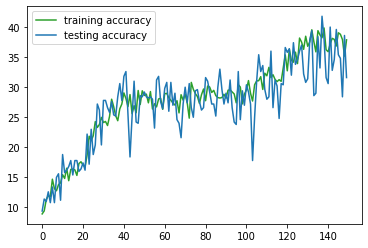

In [ ]:
learning_rate = 0.01
batch_size = 50
epochs = 150
momentum = 0.9
weight_decay = 0.05
dampening = 0
getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening)

## BatchSize Variations

### 100, momentun 0.3 

Epoch 1
-------------------------------
Training loop: loss: 2.994647  [    0/ 4000]
Training Accuracy: 5.1%
Testing loop: 
 Accuracy: 6.6%, Avg loss: 2.989008 

Epoch 2
-------------------------------
Training loop: loss: 2.982416  [    0/ 4000]
Training Accuracy: 8.7%
Testing loop: 
 Accuracy: 11.4%, Avg loss: 2.982104 

Epoch 3
-------------------------------
Training loop: loss: 2.985350  [    0/ 4000]
Training Accuracy: 11.0%
Testing loop: 
 Accuracy: 10.4%, Avg loss: 2.975524 

Epoch 4
-------------------------------
Training loop: loss: 2.972277  [    0/ 4000]
Training Accuracy: 15.1%
Testing loop: 
 Accuracy: 16.0%, Avg loss: 2.967580 

Epoch 5
-------------------------------
Training loop: loss: 2.973943  [    0/ 4000]
Training Accuracy: 19.4%
Testing loop: 
 Accuracy: 19.6%, Avg loss: 2.958011 

Epoch 6
-------------------------------
Training loop: loss: 2.959793  [    0/ 4000]
Training Accuracy: 22.7%
Testing loop: 
 Accuracy: 24.0%, Avg loss: 2.944798 

Epoch 7
-----------

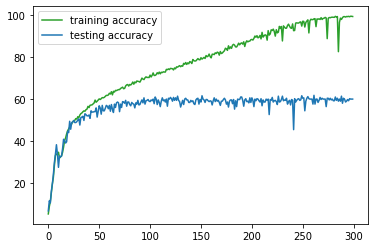

In [ ]:
learning_rate = 0.01
batch_size = 100
epochs = 300
momentum = 0.3
weight_decay = 0
dampening = 0
getAccuracies(learning_rate, batch_size, momentum, weight_decay, dampening)

### Default

Epoch 1
-------------------------------
Training loop: loss: 2.999373  [    0/ 4000]
Training Accuracy: 6.2%
Testing loop: 
 Accuracy: 6.6%, Avg loss: 2.994164 

Epoch 2
-------------------------------
Training loop: loss: 2.999091  [    0/ 4000]
Training Accuracy: 5.9%
Testing loop: 
 Accuracy: 7.0%, Avg loss: 2.992778 

Epoch 3
-------------------------------
Training loop: loss: 2.992199  [    0/ 4000]
Training Accuracy: 6.0%
Testing loop: 
 Accuracy: 6.2%, Avg loss: 2.991532 

Epoch 4
-------------------------------
Training loop: loss: 2.993323  [    0/ 4000]
Training Accuracy: 5.8%
Testing loop: 
 Accuracy: 6.2%, Avg loss: 2.990354 

Epoch 5
-------------------------------
Training loop: loss: 2.992879  [    0/ 4000]
Training Accuracy: 5.8%
Testing loop: 
 Accuracy: 6.4%, Avg loss: 2.989195 

Epoch 6
-------------------------------
Training loop: loss: 2.989807  [    0/ 4000]
Training Accuracy: 5.7%
Testing loop: 
 Accuracy: 6.2%, Avg loss: 2.988096 

Epoch 7
--------------------

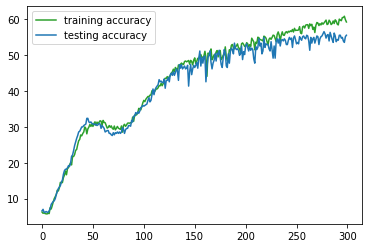

In [ ]:
# Hyperparameters
learning_rate = 0.01
batch_size = 500
epochs = 300
momentum = 0
weight_decay = 0
dampening = 0


# Train and Test
test_accs = []
test_losses = []
training_accs = []
model = TinyQuickDrawStudentClassifier().to(device)
model.requires_grad_(True)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), 
                        lr = learning_rate, 
                        momentum = momentum, 
                        weight_decay = weight_decay, 
                        dampening= dampening)
# Loss Func
loss_fn = nn.CrossEntropyLoss()
# Dataloaders
# Created a bigger training dataset for better model training
train_data_dir = "tiny_quick_draw/bigger_train"
train_data = ImageFolder(train_data_dir, transform=Compose([ToTensor()]))
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
example_train_accs = []
example_test_accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    training_acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    testing_acc, _ = test_loop(test_dataloader, model, loss_fn)
    example_train_accs.append(training_acc)
    example_test_accs.append(testing_acc)
print("Done!")

epoch_list = [i for i in range(epochs)]
plt.plot(epoch_list, example_train_accs, color ='tab:green', label='training accuracy')
plt.plot(epoch_list, example_test_accs, color ='tab:blue', label='testing accuracy')
plt.legend()

# Fine-Tuning Hyperparameters

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get some practice with this.

## Exercise 2.1.3

Below, you should experiment with different values of the various hyperparameters, including layer size, batch size, learning rate, and number of training epochs. You should also experiment with SGD optimization hyperparameters including momentum, weight decay and more. Plot at least 3 graphs to illustrate how does the change of one hyperparameter (choose any except for epochs) affect the training and testing accuracy and testing loss. To show these plots, you can add more code blocks in this section. We provide a boilerplate code for one (epochs) to give an idea of what we are looking for.

Currently running epoch 1
Currently running epoch 1
Currently running epoch 2
Currently running epoch 3
Currently running epoch 4
Currently running epoch 5
Currently running epoch 1
Currently running epoch 2
Currently running epoch 3
Currently running epoch 4
Currently running epoch 5
Currently running epoch 6
Currently running epoch 7
Currently running epoch 8
Currently running epoch 9
Currently running epoch 10
Currently running epoch 1
Currently running epoch 2
Currently running epoch 3
Currently running epoch 4
Currently running epoch 5
Currently running epoch 6
Currently running epoch 7
Currently running epoch 8
Currently running epoch 9
Currently running epoch 10
Currently running epoch 11
Currently running epoch 12
Currently running epoch 13
Currently running epoch 14
Currently running epoch 15
Currently running epoch 1
Currently running epoch 2
Currently running epoch 3
Currently running epoch 4
Currently running epoch 5
Currently running epoch 6
Currently running epoch 7
Curre

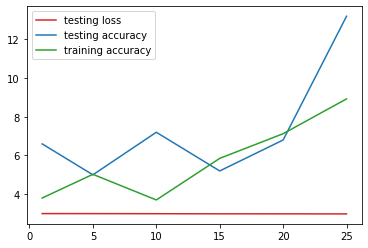

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in epochs: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(e):
        print(f"Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(epochs,test_losses, color ='tab:red', label='testing loss')
plt.plot(epochs,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(epochs,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

### Including weight decay and momentum in variable epochs

Done!


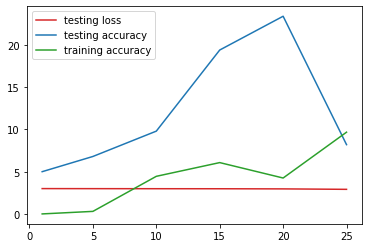

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0.9
weight_decay = 0.01
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in epochs: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(e):
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(epochs,test_losses, color ='tab:red', label='testing loss')
plt.plot(epochs,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(epochs,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

Varying the momentum and decay for the same epoch changes we see that the improvement happens earlier.

### Varying batch Sizes and visualizing how increasing batch sizes makes changes in training, testing, validation accuracies.

Currently Running for Batch set as 2
Currently Running for Batch set as 8
Currently Running for Batch set as 16
Currently Running for Batch set as 32
Currently Running for Batch set as 64
Currently Running for Batch set as 100
Currently Running for Batch set as 500
Done!


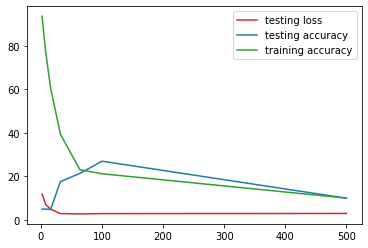

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = [2, 8 , 16, 32, 64, 100, 500]
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in batch_size: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    print(f"Currently Running for Batch set as {e}")
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=e)
    test_dataloader = DataLoader(test_data, batch_size=e)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(100):
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(batch_size,test_losses, color ='tab:red', label='testing loss')
plt.plot(batch_size,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(batch_size,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

When Batch size is less we are able to get a good accuracy on the training set because it learns like identity function, and when we take the whole of 500 at at time the accuracy reduces.

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = [16, 32, 64, 100, 500]
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0.9
weight_decay = 0.01
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in batch_size: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    print(f"Currently Running for Batch set as {e}")
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=e)
    test_dataloader = DataLoader(test_data, batch_size=e)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(50):
        print(f"---Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(batch_size,test_losses, color ='tab:red', label='testing loss')
plt.plot(batch_size,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(batch_size,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

Currently Running for Batch set as 2
---Currently running epoch 1
---Currently running epoch 2
---Currently running epoch 3
---Currently running epoch 4
---Currently running epoch 5
---Currently running epoch 6
---Currently running epoch 7
---Currently running epoch 8
---Currently running epoch 9
---Currently running epoch 10
---Currently running epoch 11
---Currently running epoch 12
---Currently running epoch 13
---Currently running epoch 14
---Currently running epoch 15
---Currently running epoch 16
---Currently running epoch 17
---Currently running epoch 18
---Currently running epoch 19
---Currently running epoch 20
---Currently running epoch 21
---Currently running epoch 22
---Currently running epoch 23
---Currently running epoch 24
---Currently running epoch 25
---Currently running epoch 26
---Currently running epoch 27
---Currently running epoch 28
---Currently running epoch 29
---Currently running epoch 30
---Currently running epoch 31
---Currently running epoch 32
---Currently

KeyboardInterrupt: ignored

### Variable Batch Size and momentum and weight decay

### Variable Learning Rate

Currently Running for Learning rate set as 0.1
Currently Running for Learning rate set as 0.01
Currently Running for Learning rate set as 0.001
Currently Running for Learning rate set as 0.5
Currently Running for Learning rate set as 1
Done!


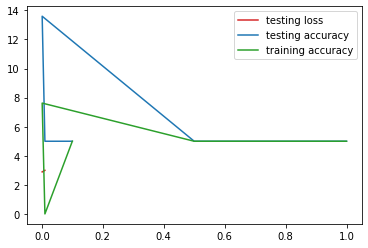

In [ ]:
# Hyperparameters
learning_rate = [0.1, 0.01, 0.001, 0.5, 1]
batch_size = 50
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0.9
weight_decay = 0.01
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in learning_rate: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    print(f"Currently Running for Learning rate set as {e}")
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = e, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(50):
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(learning_rate,test_losses, color ='tab:red', label='testing loss')
plt.plot(learning_rate,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(learning_rate,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

### Variable Learning Rate with weight decay

Currently Running for Learning rate set as 0.001
Currently Running for Learning rate set as 0.01
Currently Running for Learning rate set as 0.1
Currently Running for Learning rate set as 0.5
Currently Running for Learning rate set as 1
Done!


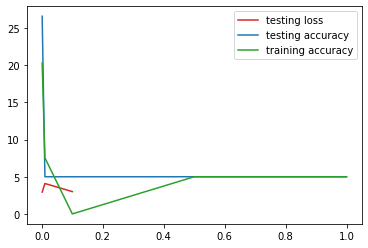

In [ ]:
# Hyperparameters
learning_rate = [0.001, 0.01, 0.1, 0.5, 1]
batch_size = 50
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in learning_rate: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    print(f"Currently Running for Learning rate set as {e}")
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = e, 
                            momentum = momentum, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(50):
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(learning_rate,test_losses, color ='tab:red', label='testing loss')
plt.plot(learning_rate,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(learning_rate,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

I think the algorithm gets stuck after particular learning rate.

### Variable momentum

Currently Running for momentum set as 0.03
Currently Running for momentum set as 0.1
Currently Running for momentum set as 0.3
Currently Running for momentum set as 0.5
Currently Running for momentum set as 0.8
Currently Running for momentum set as 0.9
Currently Running for momentum set as 1
Done!


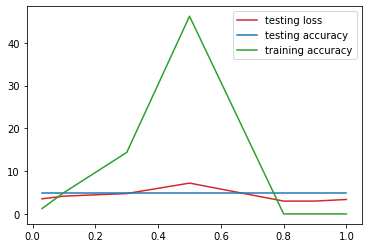

In [ ]:
# Hyperparameters
learning_rate = 0.01
batch_size = 50
epochs = [1, 5, 10, 15, 20, 25]
momentum = [0.03,0.1, 0.3, 0.5, 0.8, 0.9,1]
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in momentum: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    print(f"Currently Running for momentum set as {e}")
    model = TinyQuickDrawStudentClassifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), 
                            lr = learning_rate, 
                            momentum = e, 
                            weight_decay = weight_decay, 
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(50):
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss) 
    training_accs.append(final_train_acc)
plt.plot(momentum,test_losses, color ='tab:red', label='testing loss')
plt.plot(momentum,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(momentum,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")

Momentum works well when it is 0.5 else we see it reduces the accuracy on both side of the 0.5 .